In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_filename = '/content/drive/MyDrive/Data Stock/data_with_features.csv'

In [3]:
df_model_data = pd.read_csv(input_filename)

In [4]:
df_model_data['Date'] = pd.to_datetime(df_model_data['Date'])

In [5]:
# Tạo biến mục tiêu
df_model_data['target'] = df_model_data.groupby('Symbol')['daily_return'].shift(-1)

df_model_data.dropna(inplace=True)

# Xác định các cột đặc trưng
features = [col for col in df_model_data.columns if col not in [
    'Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
    'Dividends', 'Stock Splits', 'GICS Sector', 'daily_return', 'target'
]]
X = df_model_data[features]
y = df_model_data['target']
print("Đã tách X và y.")

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    n_jobs=-1
)
model.fit(X, y, verbose=False)

# Lấy và hiển thị kết quả
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 20 đặc trưng quan trọng nhất:")
print(feature_importance.head(20))

Đã tách X và y.

Top 20 đặc trưng quan trọng nhất:
                 feature  importance
20        BBB_20_2.0_2.0    0.075963
27    daily_return_lag_4    0.068704
30  risk_adjusted_return    0.064286
28    daily_return_lag_5    0.061669
14         MACDs_12_26_9    0.058266
24    daily_return_lag_1    0.053771
21        BBP_20_2.0_2.0    0.050620
25    daily_return_lag_2    0.049424
26    daily_return_lag_3    0.044298
13         MACDh_12_26_9    0.040784
11                RSI_14    0.040033
12          MACD_12_26_9    0.033254
31      return_vs_sector    0.032207
23                   OBV    0.027637
6                   beta    0.025593
17        BBL_20_2.0_2.0    0.024223
1            priceToBook    0.022128
9              marketCap    0.021391
18        BBM_20_2.0_2.0    0.021271
15                EMA_20    0.019334


/tmp/ipython-input-2835877243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance.head(20), palette='viridis')


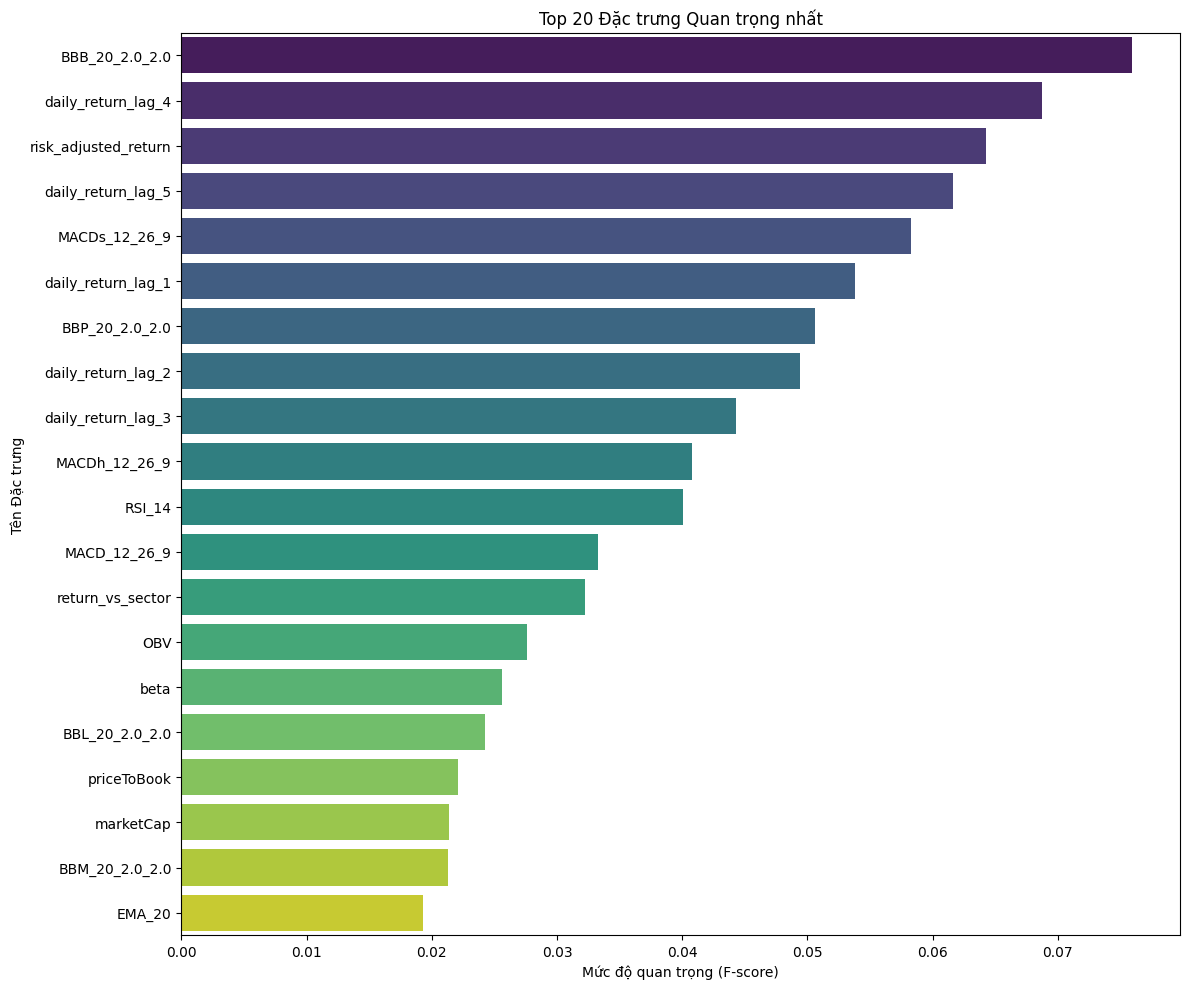

In [6]:
# Trực quan hóa
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20), palette='viridis')
plt.title('Top 20 Đặc trưng Quan trọng nhất')
plt.xlabel('Mức độ quan trọng (F-score)')
plt.ylabel('Tên Đặc trưng')
plt.tight_layout()
plt.show()